In [3]:
import pandas as pd
import os

DATA_FOLDER = "data/"

annotations = pd.read_csv(
    os.path.join(DATA_FOLDER, "clinical_annotation.csv"), index_col=0
)

In [6]:
annotations

,ID,LABEL,GENDER,DOB,LYMPH_COUNT
0,P26,1,M,11/3/1933,11.20
1,P183,1,M,5/15/1942,12.80
2,P89,1,M,6/19/1935,9.60
3,P123,1,M,1/27/1931,122.60
4,P61,1,F,3/5/1931,11.60
...,...,...,...,...,...
200,P135,1,M,27-08-1951,9.45
201,P8,0,M,16-05-1975,4.91
202,P130,0,F,16-05-1943,4.17
203,P70,1,M,05-09-1987,5.66


In [11]:
trainset_true = pd.read_csv(
    os.path.join(DATA_FOLDER, "trainset", "trainset_true.csv"), index_col=0
)
testset_csv = pd.read_csv(
    os.path.join(DATA_FOLDER, "testset", "testset_data.csv"), index_col=0
)

(163, 4)
(42, 4)


In [14]:
trainset_true

,LABEL,GENDER,DOB,LYMPH_COUNT
ID,,,,
P26,1,M,11/3/1933,11.20
P183,1,M,5/15/1942,12.80
P89,1,M,6/19/1935,9.60
P123,1,M,1/27/1931,122.60
P61,1,F,3/5/1931,11.60
...,...,...,...,...
P135,1,M,27-08-1951,9.45
P8,0,M,16-05-1975,4.91
P130,0,F,16-05-1943,4.17


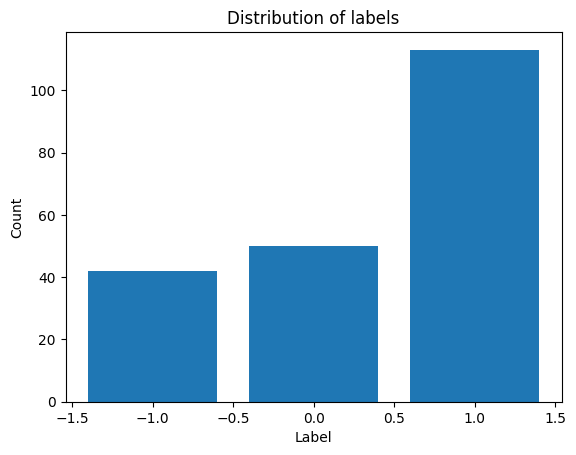

In [7]:
import matplotlib.pyplot as plt

labels = annotations["LABEL"].value_counts()

fig, ax = plt.subplots()
ax.bar(labels.index, labels.values)
ax.set_xlabel("Label")
ax.set_ylabel("Count")
ax.set_title("Distribution of labels of patients")
plt.show()

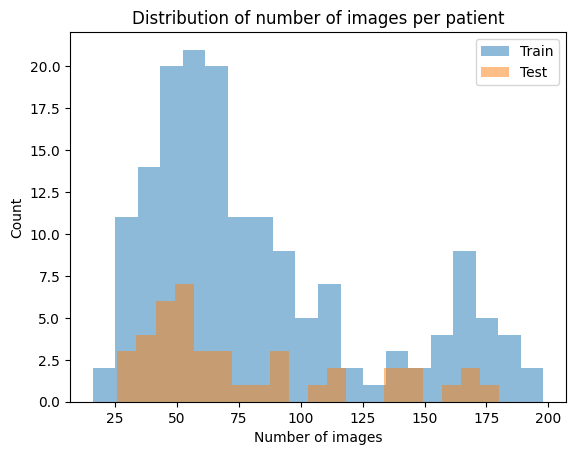

min train: 16
max train: 198
average train: 82.53374233128834
median train: 66
total train: 13453
min test: 26
max test: 180
average test: 77.57142857142857
median test: 59
total test: 3258


In [13]:
train_data = os.path.join(DATA_FOLDER, "trainset")
test_data = os.path.join(DATA_FOLDER, "testset")

train_counts = [
    len(os.listdir(os.path.join(train_data, patient_directory)))
    for patient_directory in os.listdir(train_data)
    if not patient_directory.endswith("csv")
]

test_counts = [
    len(os.listdir(os.path.join(test_data, patient_directory)))
    for patient_directory in os.listdir(test_data)
    if not patient_directory.endswith("csv")
]

fig, ax = plt.subplots()
ax.hist(train_counts, bins=20, alpha=0.5, label="Train")
ax.hist(test_counts, bins=20, alpha=0.5, label="Test")
ax.set_xlabel("Number of images")
ax.set_ylabel("Count")
ax.set_title("Distribution of number of images per patient")
ax.legend()
plt.show()

print("min train:", min(train_counts))
print("max train:", max(train_counts))
print("average train:", sum(train_counts) / len(train_counts))
print("median train:", sorted(train_counts)[len(train_counts) // 2])
print("total train:", sum(train_counts))

print("min test:", min(test_counts))
print("max test:", max(test_counts))
print("average test:", sum(test_counts) / len(test_counts))
print("median test:", sorted(test_counts)[len(test_counts) // 2])
print("total test:", sum(test_counts))

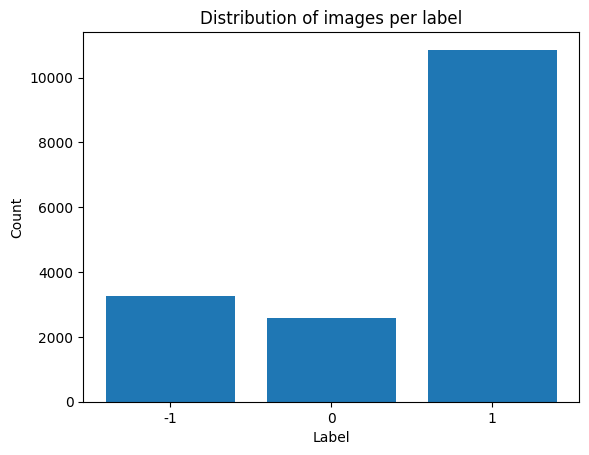

counts of -1, 0, 1: [3258.0, 2592.0, 10861.0]


In [23]:
for patient_id in trainset_true.index:
    trainset_true.loc[patient_id, "number_images"] = len(
        os.listdir(os.path.join(train_data, patient_id))
    )

for patient_id in testset_csv.index:
    testset_csv.loc[patient_id, "number_images"] = len(
        os.listdir(os.path.join(test_data, patient_id))
    )

counts = [0] * 3  # -1, 0, 1

for patient_id in trainset_true.index:
    patient_row = trainset_true.loc[patient_id]
    counts[patient_row["LABEL"] + 1] += patient_row["number_images"]

for patient_id in testset_csv.index:
    patient_row = testset_csv.loc[patient_id]
    counts[patient_row["LABEL"] + 1] += patient_row["number_images"]

fig, ax = plt.subplots()
ax.bar(["-1", "0", "1"], counts)
ax.set_xlabel("Label")
ax.set_ylabel("Count")
ax.set_title("Distribution of images per label")
plt.show()

print(f"counts of -1, 0, 1: {counts}")